In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#datapoints = [(496,-135), (773,-90), (1340,0), (1945,90), (2463,180)]
datapoints = [(-135,496), (-90,773), (0,1340), (90,1945), (180,2463)]
dpt_zip = zip(*datapoints)
dpt_zip

[(-135, -90, 0, 90, 180), (496, 773, 1340, 1945, 2463)]

In [4]:
# Plot of the multi-mapping vs the mapping
# simple mapping, data organized as x0, x1 ; y0, y1
extreme_pts = [(dpt_zip[0][0], dpt_zip[0][-1]), (dpt_zip[1][0],dpt_zip[1][-1])]
plt.plot(extreme_pts[0], extreme_pts[1], c='b', linestyle='--',label='map (minmax)')
# multimapping
plt.plot(dpt_zip[0], dpt_zip[1], c='g', linestyle='-.', label='multimap (points)')
plt.scatter(dpt_zip[0], dpt_zip[1], marker='o', edgecolor='r', facecolor='r', s=50, label='data points')
plt.legend()
dpt_zip[0][0], dpt_zip[0][-1], dpt_zip[1][0], dpt_zip[1][-1]

(-135, 180, 496, 2463)

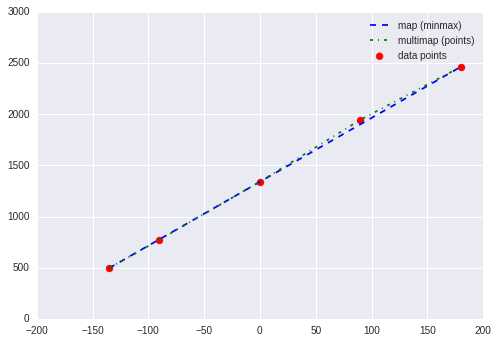

In [7]:
fig = plt.gcf()
fig.savefig("./approximations.png")
plt.show()

In [8]:
# Evaluate numerically the error: we compute the estimation provided
# by the simple mapping and compare that versus the multimapping
# simple mapping : Y = aX+b
def f_simple(x, a, b):
    return a*x + b

a_coeff = (extreme_pts[1][1] - extreme_pts[1][0]) / (extreme_pts[0][1] - extreme_pts[0][0])
# origin value for 0 estimated from 1st datapoint
b_coeff1 = extreme_pts[1][0] - a_coeff * extreme_pts[0][0] # value for x = 0
# origin value for 0 estimated from last datapoint
b_coeff2 = extreme_pts[1][1] - a_coeff * extreme_pts[0][1] # value for x = 0
# origin value for 0 estimated from average of extreme datapoint
#b_coeff3 = (extreme_pts[1][0] + extreme_pts[1][1])/2 - a_coeff * extreme_pts[0][1] # value for x = 0

a_coeff, b_coeff1, b_coeff2

(6, 1306, 1383)

In [9]:
# now we compare f_simple and the multimap points
for pt in datapoints:
    y_simple1 = f_simple(pt[0], a_coeff, b_coeff1)
    y_simple2 = f_simple(pt[0], a_coeff, b_coeff2)
    y_multi = pt[1]
    # use absolute value (we don't care about the sign of error)
    error1 = abs(y_simple1 - y_multi)
    error2 = abs(y_simple2 - y_multi)
    # relative error assuming the datapoints are the theoretical value
    relative_error1 = float(error1) / y_multi
    relative_error2 = float(error2) / y_multi
    print('x= '+str(pt[0])+', multimap y= '+str(y_multi)+'\n'
          +'map_1: y= '+str(y_simple1)+' abs error= '+str(error1)+' relative error= '+str(100*round(relative_error1,3))+' %, '+ str(round(pt[0]*relative_error1,3))+' deg\n'
          +'map_2: y= '+str(y_simple2)+' abs error= '+str(error2)+' relative error= '+str(100*round(relative_error2,3))+' %, '+ str(round(pt[0]*relative_error2,3))+' deg\n')

x= -135, multimap y= 496
map_1: y= 496 abs error= 0 relative error= 0.0 %, -0.0 deg
map_2: y= 573 abs error= 77 relative error= 15.5 %, -20.958 deg

x= -90, multimap y= 773
map_1: y= 766 abs error= 7 relative error= 0.9 %, -0.815 deg
map_2: y= 843 abs error= 70 relative error= 9.1 %, -8.15 deg

x= 0, multimap y= 1340
map_1: y= 1306 abs error= 34 relative error= 2.5 %, 0.0 deg
map_2: y= 1383 abs error= 43 relative error= 3.2 %, 0.0 deg

x= 90, multimap y= 1945
map_1: y= 1846 abs error= 99 relative error= 5.1 %, 4.581 deg
map_2: y= 1923 abs error= 22 relative error= 1.1 %, 1.018 deg

x= 180, multimap y= 2463
map_1: y= 2386 abs error= 77 relative error= 3.1 %, 5.627 deg
map_2: y= 2463 abs error= 0 relative error= 0.0 %, 0.0 deg

